In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(15,7)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [3]:
np.random.seed(9)

In [4]:
with open('DATA.pkl', 'rb') as file:
    data=pickle.load(file)
data

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,rdkit_mol,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6bac5e9d0>,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6bac5ea78>,1,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,1
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6bac5eae8>,1,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,3,NH2,1,-1.85,NH2_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b6b3af48>,14,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
4,4,NH2,2,-1.92,NH2_R2_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b6b57618>,14,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b68d3d18>,15,1.0,1.0,0.0,...,0,0,1,0,0,1,0,1,0,0
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b68d3f48>,15,1.0,0.0,0.0,...,1,0,1,1,0,1,0,1,0,0
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b68db1b8>,15,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,<rdkit.Chem.rdchem.Mol object at 0x7fb6b68db3e8>,15,1.0,1.0,1.0,...,1,0,1,1,0,1,0,1,0,0


In [5]:
data.describe()

,Redox Potential,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,FG_position_6_2d_basic,FG_position_7_2d_basic,FG_position_8_2d_basic,FG_position_9_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,-1.418162,11.935135,0.772973,0.600000,0.378378,0.227027,0.243243,0.302703,0.237838,0.200000,...,0.070270,0.005405,0.691892,0.081081,0.016216,0.400000,0.010811,0.362162,0.264865,0.021622
std,0.680095,4.536819,0.420047,0.491227,0.486299,0.420047,0.430205,0.460674,0.426915,0.401085,...,0.256296,0.073521,0.462964,0.273700,0.126649,0.491227,0.103692,0.481930,0.442459,0.145839
min,-2.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.950000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.690000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.820000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,0.800000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data,
                                         shuffle=True,
                                         test_size=0.30)

with open('DATA_train.pkl','wb') as outfile:
    pickle.dump(data_train,outfile)
with open('DATA_test.pkl','wb') as outfile:
    pickle.dump(data_test,outfile)        
data_train.shape,data_test.shape

((129, 4725), (56, 4725))

# EDA (Visualization)

## Distribution of Data

Text(0.5, 1.0, 'Distribution of Redox Potential (target variable)')

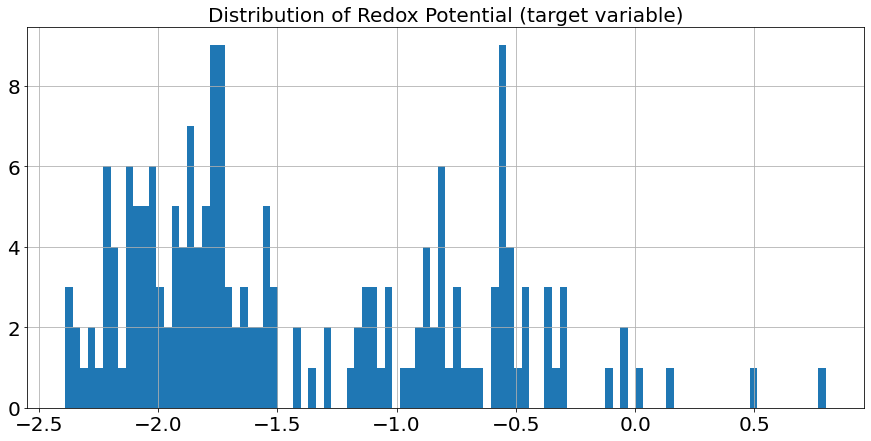

In [7]:
plt.hist(data['Redox Potential'],bins=100)
plt.title('Distribution of Redox Potential (target variable)')

Text(0.5, 1.0, 'Distribution of Redox Potential (target variable)')

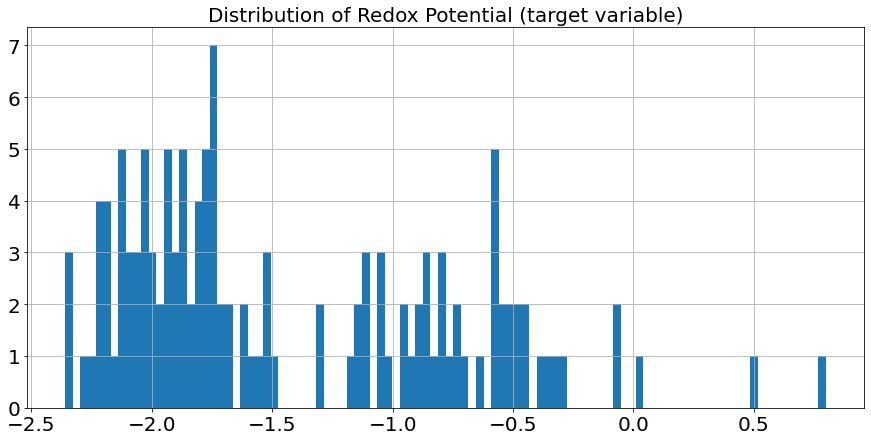

In [8]:
plt.hist(data_train['Redox Potential'],bins=100)
plt.title('Distribution of Redox Potential (target variable)')

Text(0.5, 1.0, 'Distribution of Redox Potential (target variable)')

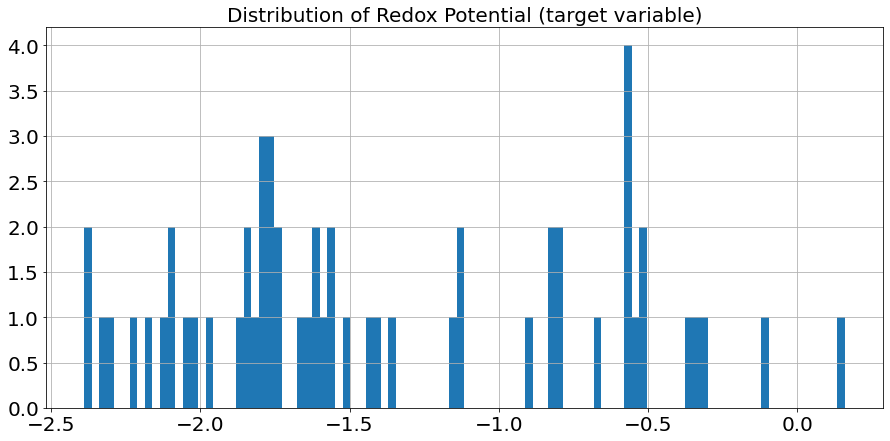

In [9]:
plt.hist(data_test['Redox Potential'],bins=100)
plt.title('Distribution of Redox Potential (target variable)')

Text(0.5, 1.0, 'Distribution of Functional Groups')

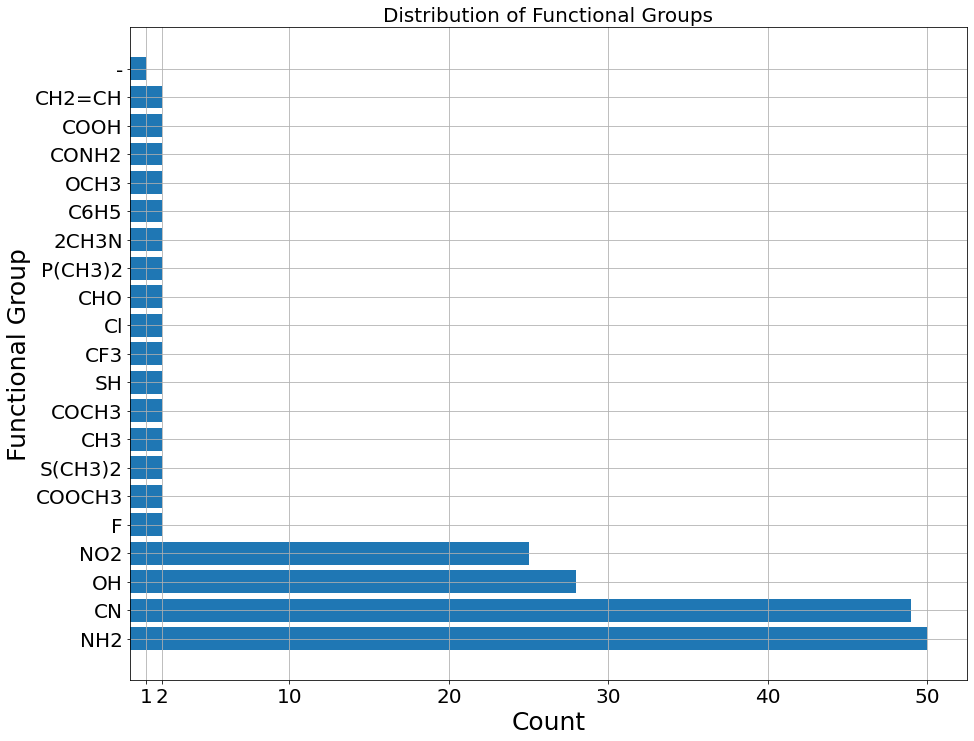

In [10]:
fg_dist=data['FG_name'].value_counts()
plt.figure(figsize=(15,12))
plt.barh(fg_dist.index,fg_dist)
plt.xlabel('Count')
plt.ylabel('Functional Group')
plt.xticks([1,2,10,20,30,40,50])
plt.title('Distribution of Functional Groups')

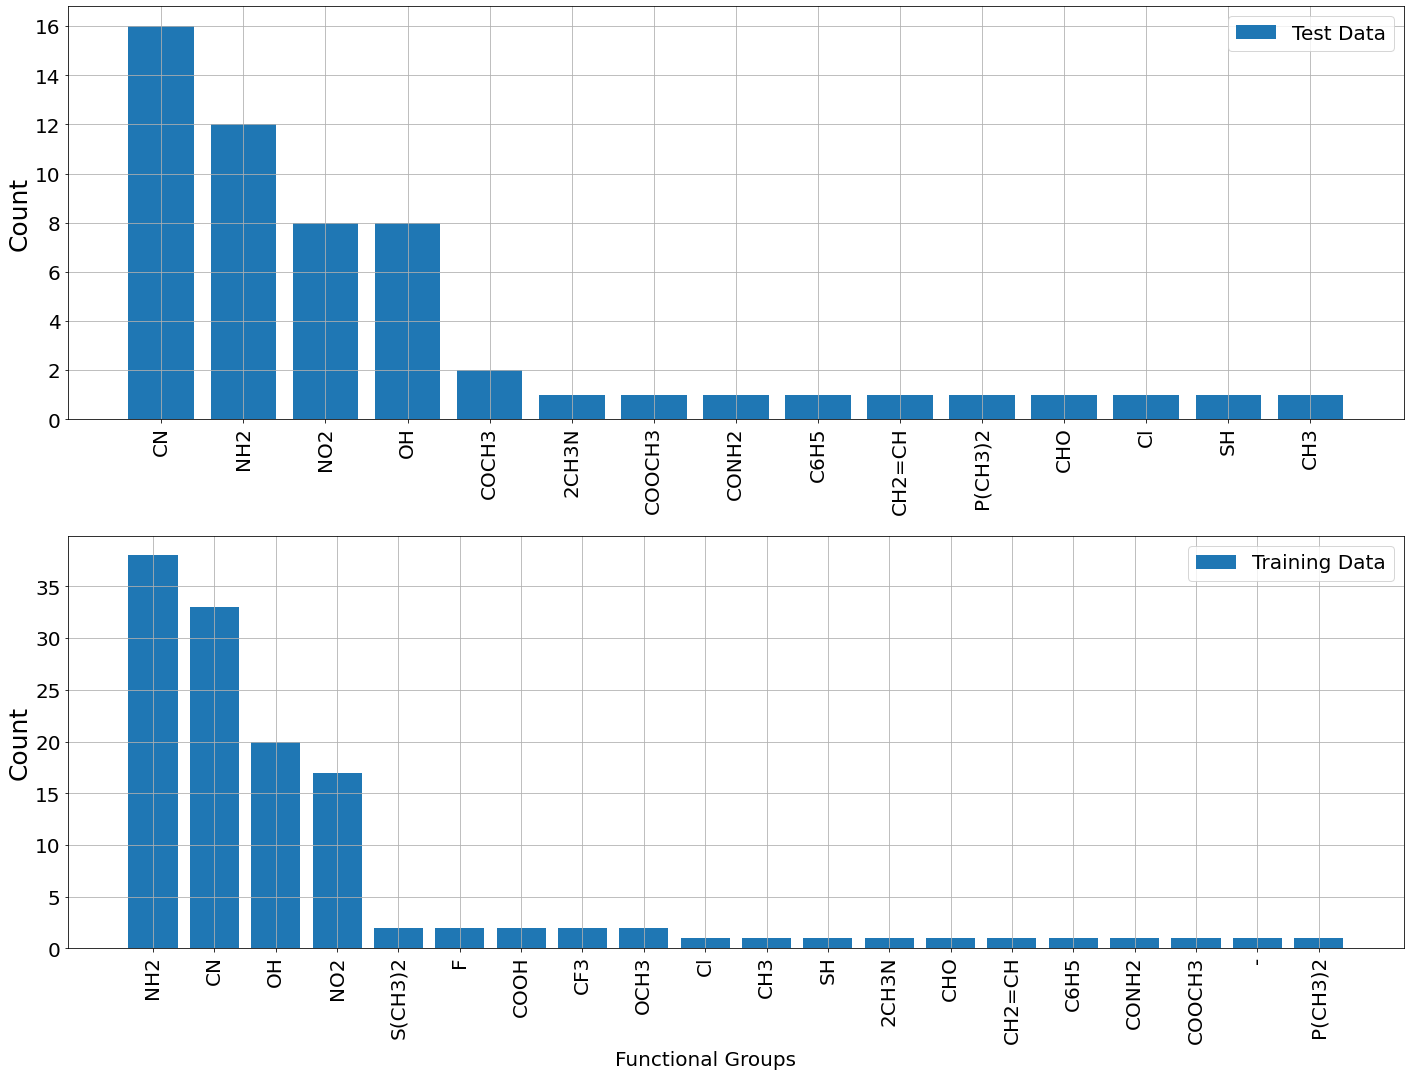

In [11]:
train_dist=data_train['FG_name'].value_counts()
test_dist=data_test['FG_name'].value_counts()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,15))

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax1.legend()
ax1.set_ylabel('Count')
ax2.legend()
ax2.set_ylabel('Count')
fig.text(0.5, 0, 'Functional Groups', ha='center', rotation='horizontal')
plt.tight_layout()

## Feature Correlations

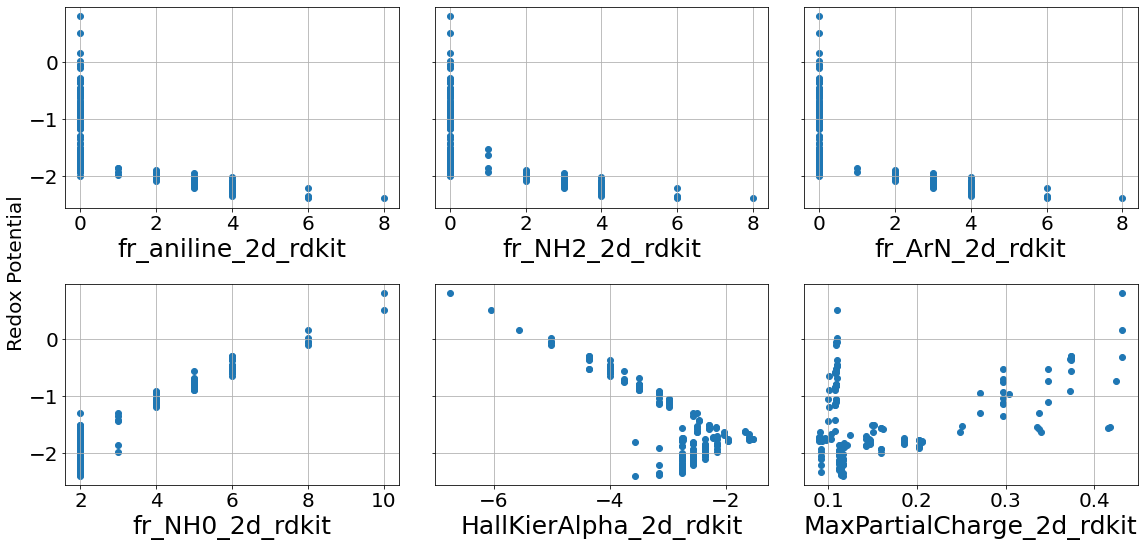

In [12]:
y=data['Redox Potential']
fig,axes=plt.subplots(2,3,figsize=(16,8),sharey=True)
axes[0][0].scatter(data['fr_aniline_2d_rdkit'],y)
axes[0][0].set_xlabel('fr_aniline_2d_rdkit')
axes[0][1].scatter(data['fr_NH2_2d_rdkit'],y)
axes[0][1].set_xlabel('fr_NH2_2d_rdkit')
axes[0][2].scatter(data['fr_ArN_2d_rdkit'],y)
axes[0][2].set_xlabel('fr_ArN_2d_rdkit')
axes[1][0].scatter(data['fr_NH0_2d_rdkit'],y)
axes[1][0].set_xlabel('fr_NH0_2d_rdkit')
axes[1][1].scatter(data['HallKierAlpha_2d_rdkit'],y)
axes[1][1].set_xlabel('HallKierAlpha_2d_rdkit')
axes[1][2].scatter(data['MaxPartialCharge_2d_rdkit'],y)
axes[1][2].set_xlabel('MaxPartialCharge_2d_rdkit')
fig.text(0, 0.5, 'Redox Potential', va='center', rotation='vertical')
plt.tight_layout()

Text(0.5, 1.0, 'Feature Correlation Plot')

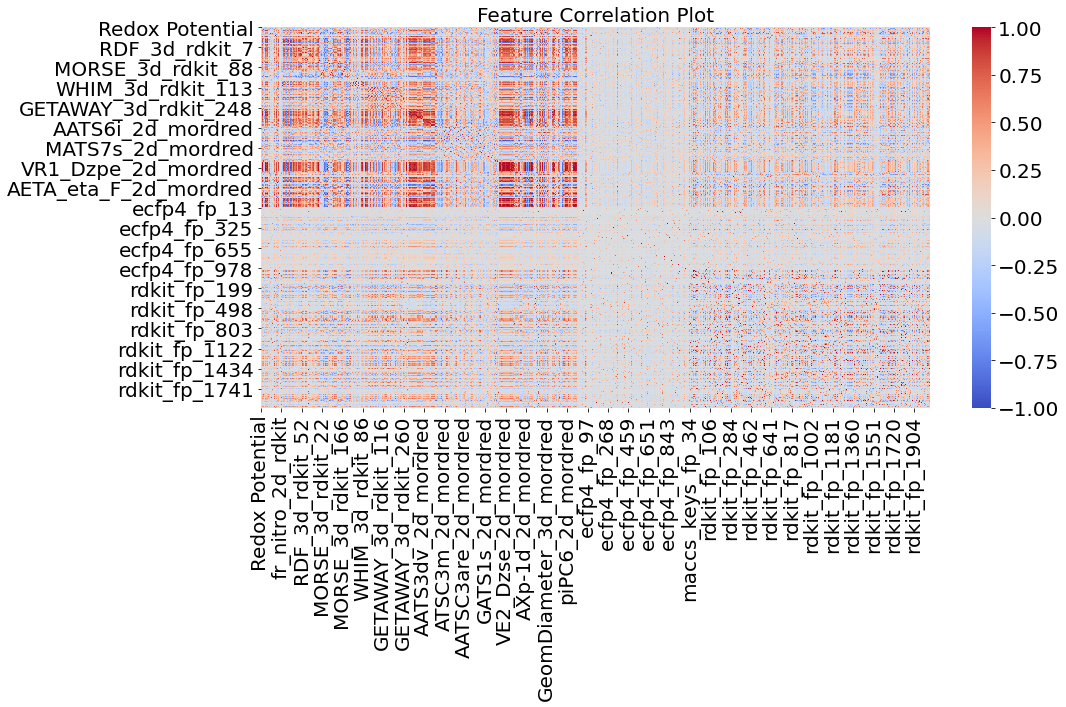

In [13]:
# plt.matshow(corr)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns
pd.options.display.max_rows = 4000


corr = data.corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Feature Correlation Plot')

In [ ]:
np.mean(y_train),np.mean(y_test)

mean_squared_error(y_test,np.full(len(y_test),np.mean(y_test)))